In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

data= pd.read_csv("data9.csv", dtype=float)
data=data.dropna(axis=0,how='any')
data.phreat[data['phreat']<0.02]=0
data.phreat[data['phreat']>=0.02]=1
#dataset= data.drop(['x','y'], axis=1)

#dataset= data.drop(['x','y','d1ndwi','d2ndwi','d1evi','d2evi','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','gwlvl','t1','t2','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)
dataset= data.drop(['x','y','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','evapot','elevation','gwlvl','truth','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2)
print(len(train_set), "train +", len(test_set), "test")

128716 train + 32179 test


In [3]:
train_set

,prec,ndvi,temp,soilmo,phreat,sat0,sat1,sat2,sat3,sat4
86881,11.3205,3785.0,11.4500,0.0801,1.0,-81.3611,-166.5000,-224.6389,-300.2500,-246.1944
2815,16.2615,2497.0,6.2135,0.2932,0.0,63.4167,72.0833,69.5278,-38.4722,132.6111
74333,10.5640,983.0,10.8595,0.3049,0.0,85.7500,69.8889,102.3056,132.5833,301.0833
78641,13.9865,1679.0,8.6485,0.1282,0.0,-19.9444,-43.4167,-43.0278,19.0278,74.8889
146488,7.3040,1132.0,11.1185,0.0843,0.0,15.7500,75.7500,116.4722,88.2778,140.0833
53113,24.7515,1723.0,9.9360,0.0805,0.0,12.9722,-54.7222,-102.8056,-130.1944,-100.5278
52871,20.8050,3524.0,7.1145,0.0800,0.0,46.3889,40.3056,99.4444,57.0000,74.5278
59424,15.4760,1692.0,9.1145,0.0925,0.0,24.7778,27.0556,-0.7778,-57.4167,87.1944
109639,8.3225,484.0,12.2335,0.2007,1.0,-223.2778,45.6111,-566.3611,-176.6389,-287.6111
95529,19.6275,2733.0,6.0460,0.0800,0.0,-101.6667,-57.8889,-42.9722,-122.6944,119.8333


In [4]:
#training = train_set.drop(['x','y','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','evapot','elevation','gwlvl','truth','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)
#testing = test_set.drop(['x','y','d1prec','d2prec','d1ndvi','d2ndvi','d1temp','d2temp','evapot','elevation','gwlvl','truth','d1sat0','d2sat0','d1sat1','d2sat1','d1sat2','d2sat2','d1sat3','d2sat3','d1sat4','d2sat4'], axis=1)

#data_x, data_y = datatest, datatest.pop('phreat')
#data_x.head()

train_x, train_y = train_set, train_set.pop('phreat')
test_x, test_y = test_set, test_set.pop('phreat')
train_x.head()

,prec,ndvi,temp,soilmo,sat0,sat1,sat2,sat3,sat4
86881,11.3205,3785.0,11.4500,0.0801,-81.3611,-166.5000,-224.6389,-300.2500,-246.1944
2815,16.2615,2497.0,6.2135,0.2932,63.4167,72.0833,69.5278,-38.4722,132.6111
74333,10.5640,983.0,10.8595,0.3049,85.7500,69.8889,102.3056,132.5833,301.0833
78641,13.9865,1679.0,8.6485,0.1282,-19.9444,-43.4167,-43.0278,19.0278,74.8889
146488,7.3040,1132.0,11.1185,0.0843,15.7500,75.7500,116.4722,88.2778,140.0833


In [5]:
train_y

86881     1.0
2815      0.0
74333     0.0
78641     0.0
146488    0.0
53113     0.0
52871     0.0
59424     0.0
109639    1.0
95529     0.0
117077    0.0
147507    0.0
156879    0.0
34872     0.0
122242    0.0
5953      0.0
147233    0.0
36514     0.0
50257     0.0
118173    0.0
126146    1.0
68570     0.0
6840      0.0
144679    0.0
122121    0.0
12912     0.0
138951    0.0
89223     0.0
116639    0.0
5839      0.0
         ... 
124315    0.0
2749      0.0
130986    0.0
150065    0.0
122997    0.0
84768     0.0
157301    0.0
131071    0.0
160340    0.0
85595     0.0
103706    0.0
5314      0.0
64952     0.0
59761     0.0
769       0.0
64847     1.0
67293     0.0
41102     1.0
16032     0.0
126784    0.0
113119    0.0
87789     1.0
137800    0.0
54912     0.0
110657    1.0
120331    0.0
104046    0.0
132395    1.0
147428    0.0
122418    0.0
Name: phreat, Length: 128716, dtype: float64

In [6]:
import tensorflow as tf
feature_columns = []
print(train_x);
print(train_x.keys());
for key in train_x.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))
print(feature_columns)

           prec    ndvi     temp  soilmo      sat0      sat1       sat2  \
86881   11.3205  3785.0  11.4500  0.0801  -81.3611 -166.5000  -224.6389   
2815    16.2615  2497.0   6.2135  0.2932   63.4167   72.0833    69.5278   
74333   10.5640   983.0  10.8595  0.3049   85.7500   69.8889   102.3056   
78641   13.9865  1679.0   8.6485  0.1282  -19.9444  -43.4167   -43.0278   
146488   7.3040  1132.0  11.1185  0.0843   15.7500   75.7500   116.4722   
53113   24.7515  1723.0   9.9360  0.0805   12.9722  -54.7222  -102.8056   
52871   20.8050  3524.0   7.1145  0.0800   46.3889   40.3056    99.4444   
59424   15.4760  1692.0   9.1145  0.0925   24.7778   27.0556    -0.7778   
109639   8.3225   484.0  12.2335  0.2007 -223.2778   45.6111  -566.3611   
95529   19.6275  2733.0   6.0460  0.0800 -101.6667  -57.8889   -42.9722   
117077   9.3390  1325.0  11.4630  0.0930  -16.5000  -21.4722   -50.0556   
147507  16.1825  4193.0   8.0410  0.2354 -162.8056 -109.0000   -95.9167   
156879  32.9765   615.0  

In [7]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[100,500,100],
                                        n_classes=2,
                                        optimizer=tf.train.AdamOptimizer(
                                        learning_rate=0.01)
                                       )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Zikei\\AppData\\Local\\Temp\\tmpt28hir81', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C7F709AB38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
def train_func(train_x,train_y):
    dataset=tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))
    dataset = dataset.shuffle(2000).repeat().batch(100)
    return dataset

In [9]:
classifier.train(input_fn=lambda:train_func(train_x,train_y),steps=2000)

Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Zikei\AppData\Local\Temp\tmpt28hir81\model.ckpt.
INFO:tensorflow:loss = 2363.6333, step = 1
INFO:tensorflow:global_step/sec: 66.9337
INFO:tensorflow:loss = 62.948517, step = 101 (1.497 sec)
INFO:tensorflow:global_step/sec: 105.286
INFO:tensorflow:loss = 63.055676, step = 201 (0.951 sec)
INFO:tensorflow:global_step/sec: 122.582
INFO:tensorflow:loss = 55.915653, step = 301 (0.815 sec)
INFO:tensorflow:global_step/sec: 105.045
INFO:tensorflow:loss = 31.132254, step = 401 (0.953 sec)
INFO:tensorflow:global_step/sec: 92.7812
INFO:tensorflow:loss = 184.05182, step = 501 (1.078 sec)
INFO:t

In [10]:
def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
 
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)
    return dataset

In [11]:
data_x, data_y = dataset, dataset.pop('phreat')

In [12]:
predict_arr = []
predictions = classifier.predict(input_fn=lambda:eval_input_fn(data_x,labels=data_y,batch_size=100))

for predict in predictions:
    predict_arr.append(predict['probabilities'].argmax())
    
result = predict_arr == data_y
result1 = [w for w in result if w == True]
print("Accuracy is %s"%str((len(result1)/len(result))))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Zikei\AppData\Local\Temp\tmpt28hir81\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Accuracy is 0.8657820317598434


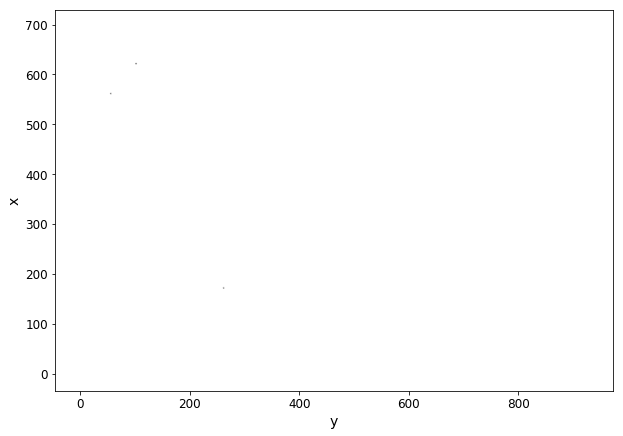

In [13]:
data.plot(kind="scatter",x="y",y="x",alpha=0.4,s=1,c=predict_arr,figsize=(10,7))

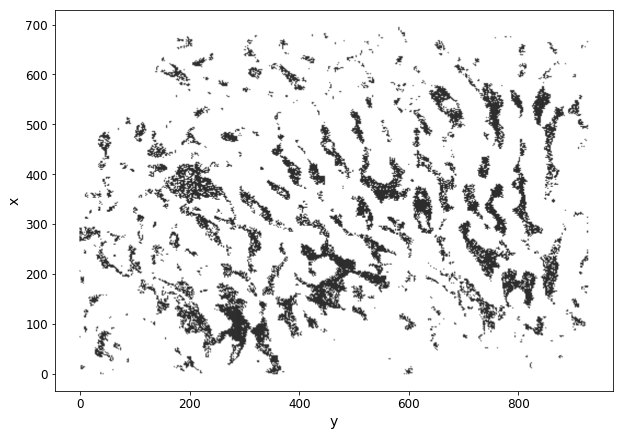

In [14]:
data.plot(kind="scatter",x="y",y="x",alpha=0.4,s=1,c=data_y,figsize=(10,7))

In [15]:
max(predict_arr)

1